In [119]:
from sklearn import tree

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [26]:
from sklearn.datasets import load_iris
iris = load_iris()

In [27]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [32]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [33]:
iris_data = pd.DataFrame(iris.data,columns = iris.feature_names)

In [36]:
iris_data.sample(10)


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
136                6.3               3.4                5.6               2.4
70                 5.9               3.2                4.8               1.8
36                 5.5               3.5                1.3               0.2
105                7.6               3.0                6.6               2.1
142                5.8               2.7                5.1               1.9
1                  4.9               3.0                1.4               0.2
119                6.0               2.2                5.0               1.5
126                6.2               2.8                4.8               1.8
101                5.8               2.7                5.1               1.9
28                 5.2               3.4                1.4               0.2

In [37]:
iris_data['class'] = iris.target

In [39]:
iris_data.sample(10)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
124                6.7               3.3                5.7               2.1   
120                6.9               3.2                5.7               2.3   
66                 5.6               3.0                4.5               1.5   
13                 4.3               3.0                1.1               0.1   
107                7.3               2.9                6.3               1.8   
121                5.6               2.8                4.9               2.0   
21                 5.1               3.7                1.5               0.4   
71                 6.1               2.8                4.0               1.3   
75                 6.6               3.0                4.4               1.4   
37                 4.9               3.1                1.5               0.1   

     class  
124      2  
120      2  
66       1  
13       0  
107      2  
121      2  
21       0  
71       1  
75       1  
37       0

In [40]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
class                150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [41]:
iris_data.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)       class  
count        150.000000  150.000000  
mean           1.198667    1.000000  
std            0.763161    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

In [42]:
iris_data.corr()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.109369           0.871754   
sepal width (cm)           -0.109369          1.000000          -0.420516   
petal length (cm)           0.871754         -0.420516           1.000000   
petal width (cm)            0.817954         -0.356544           0.962757   
class                       0.782561         -0.419446           0.949043   

                   petal width (cm)     class  
sepal length (cm)          0.817954  0.782561  
sepal width (cm)          -0.356544 -0.419446  
petal length (cm)          0.962757  0.949043  
petal width (cm)           1.000000  0.956464  
class                      0.956464  1.000000

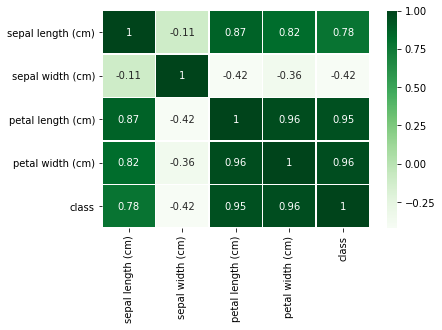

In [44]:
sns.heatmap(iris_data.corr(),annot=True,linewidth = 0.5,cmap= 'Greens');

In [47]:
sns.boxplot(x='class',y='sepal length (cm)',data=iris_data)

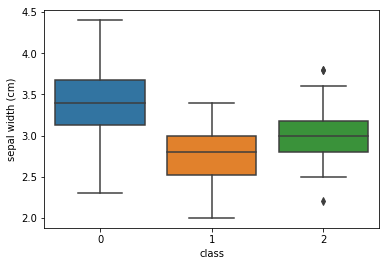

In [48]:
sns.boxplot(x='class',y='sepal width (cm)',data=iris_data)

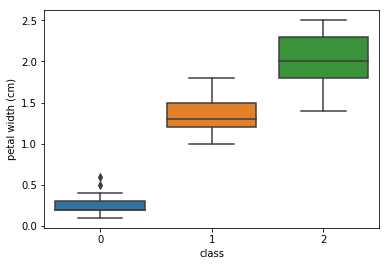

In [49]:
sns.boxplot(x='class',y='petal width (cm)',data=iris_data)

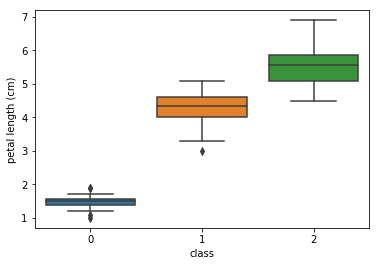

In [50]:
sns.boxplot(x='class',y='petal length (cm)',data=iris_data)

The Distribution of Data for Each Variable:


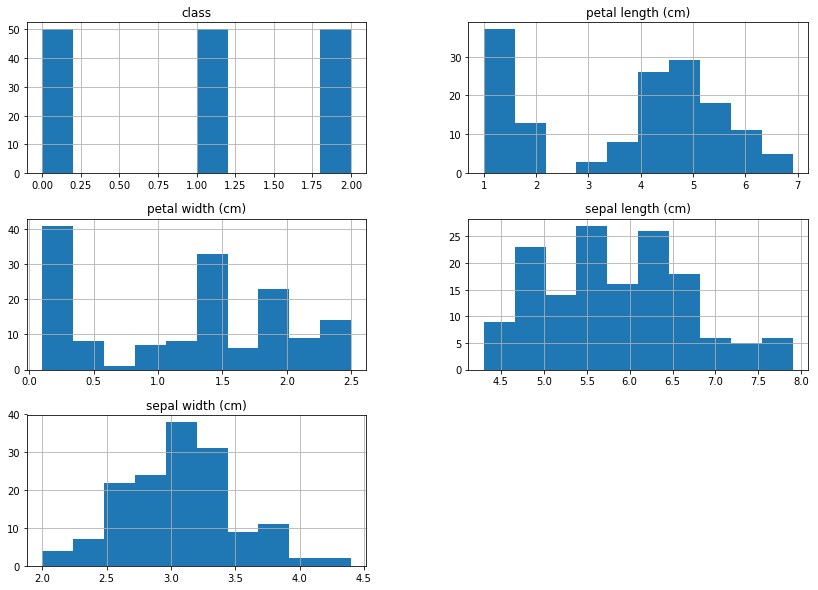

In [53]:
print("The Distribution of Data for Each Variable:")
iris_data.hist(bins=10,figsize=(14,10));

In [56]:
iris_data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')

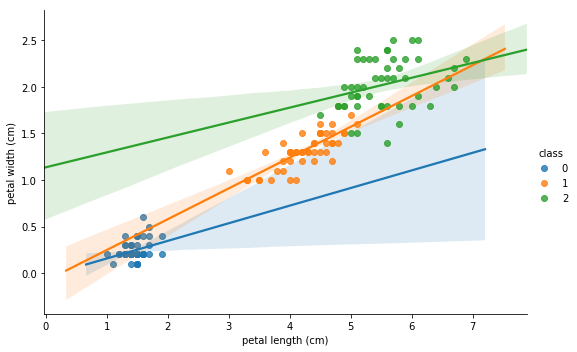

In [60]:
sns.lmplot(x='petal length (cm)',y='petal width (cm)',hue='class',data=iris_data,aspect=1.5,fit_reg=True);

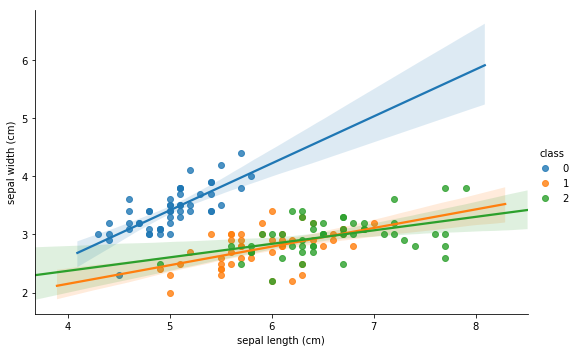

In [62]:
sns.lmplot(x='sepal length (cm)',y='sepal width (cm)',hue='class',data=iris_data,aspect=1.5,fit_reg=True);

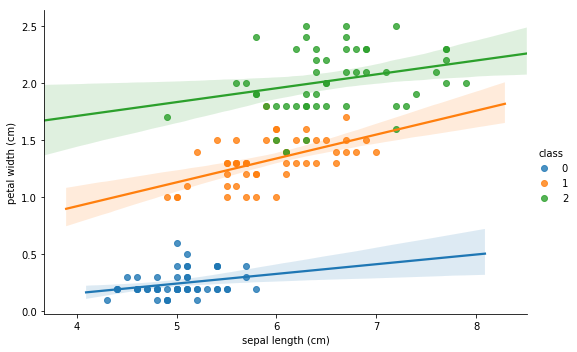

In [64]:
sns.lmplot(x='sepal length (cm)',y='petal width (cm)',hue='class',data=iris_data,aspect=1.5,fit_reg=True);

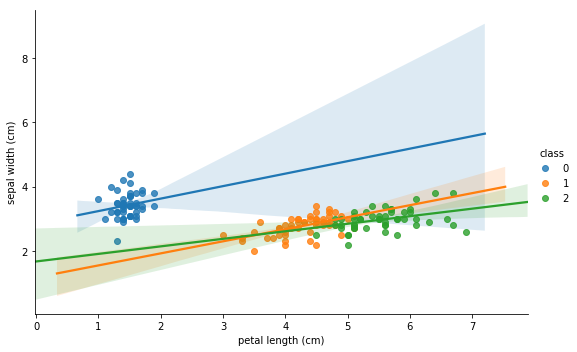

In [65]:
sns.lmplot(x='petal length (cm)',y='sepal width (cm)',hue='class',data=iris_data,aspect=1.5,fit_reg=True);

In [73]:
iris_petal_length = pd.crosstab(iris_data['petal length (cm)'],iris_data['class'])
iris_petal_width = pd.crosstab(iris_data['petal width (cm)'],iris_data['class'])
iris_sepal_length = pd.crosstab(iris_data['sepal length (cm)'],iris_data['class'])
iris_sepal_width = pd.crosstab(iris_data['sepal width (cm)'],iris_data['class'])

<Figure size 1440x720 with 0 Axes>

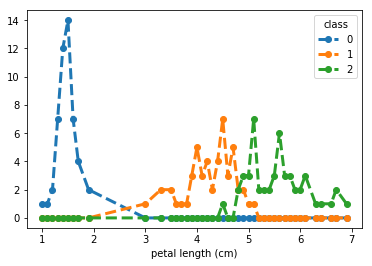

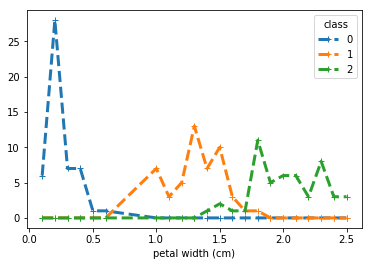

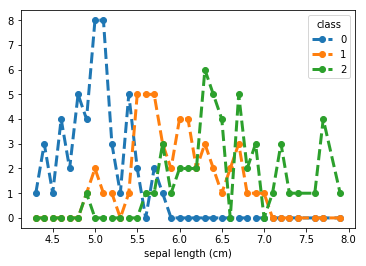

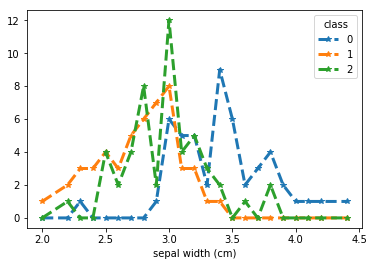

In [102]:
plt.figure(figsize=(20,10))
iris_petal_length.plot(linewidth=3,marker='o',linestyle='dashed')
iris_petal_width.plot(linewidth=3,marker='+',linestyle='dashed')
iris_sepal_length.plot(linewidth=3,marker='o',linestyle='dashed')
iris_sepal_width.plot(linewidth=3,marker='*',linestyle='dashed');

In [105]:
x = iris_data.drop('class',axis=1)
y = iris_data['class']

In [110]:
clf = tree.DecisionTreeClassifier()
clf.fit(x,y)
y_pred = clf.predict(x)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [114]:
import graphviz

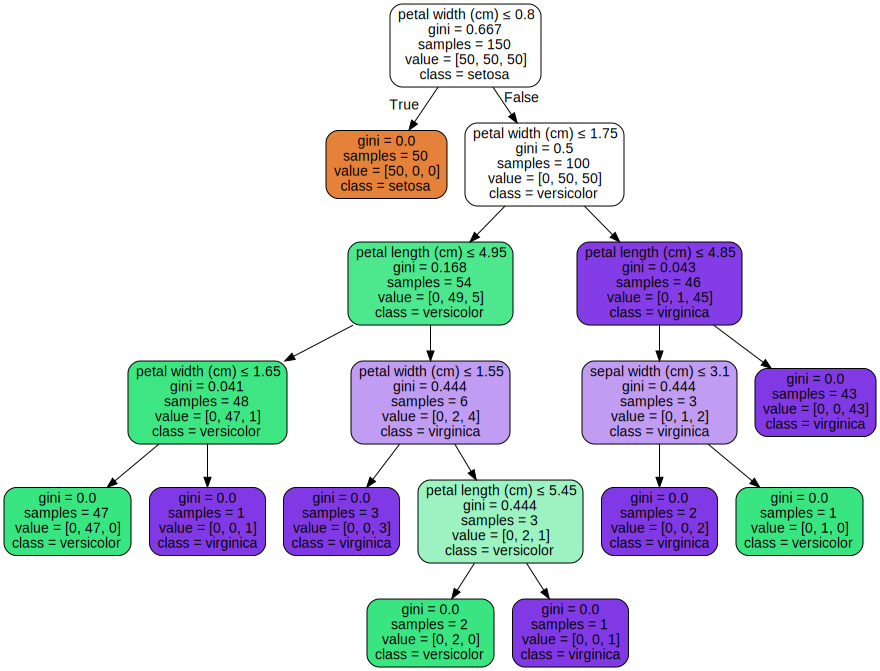

In [116]:
dot_data = tree.export_graphviz(clf,out_file = None,feature_names = iris.feature_names,class_names = iris.target_names,
                               filled = True,rounded = True,special_characters = True)
graph = graphviz.Source(dot_data)
graph